In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

In [2]:
df=pd.read_csv('city_day.csv',parse_dates=['Date'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [4]:
missing_values=pd.DataFrame(df.isna().sum()/len(df))
missing_values.columns=['Proportion']
missing_values=missing_values.sort_values(by='Proportion',ascending=False)
missing_values.style.background_gradient(cmap='Blues')

,Proportion
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196


In [5]:
df.interpolate(limit_direction="both",inplace=True)
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [6]:
rcParams['axes.spines.top']=False
rcParams['axes.spines.right']=False

rcParams['figure.dpi']=300

rcParams['figure.autolayout']=True

rcParams['font.style']='normal'
rcParams['font.size']=4

rcParams['lines.linewidth']=0.7


rcParams['xtick.labelsize']=4
rcParams['ytick.labelsize']=4

<AxesSubplot:xlabel='AQI', ylabel='City'>

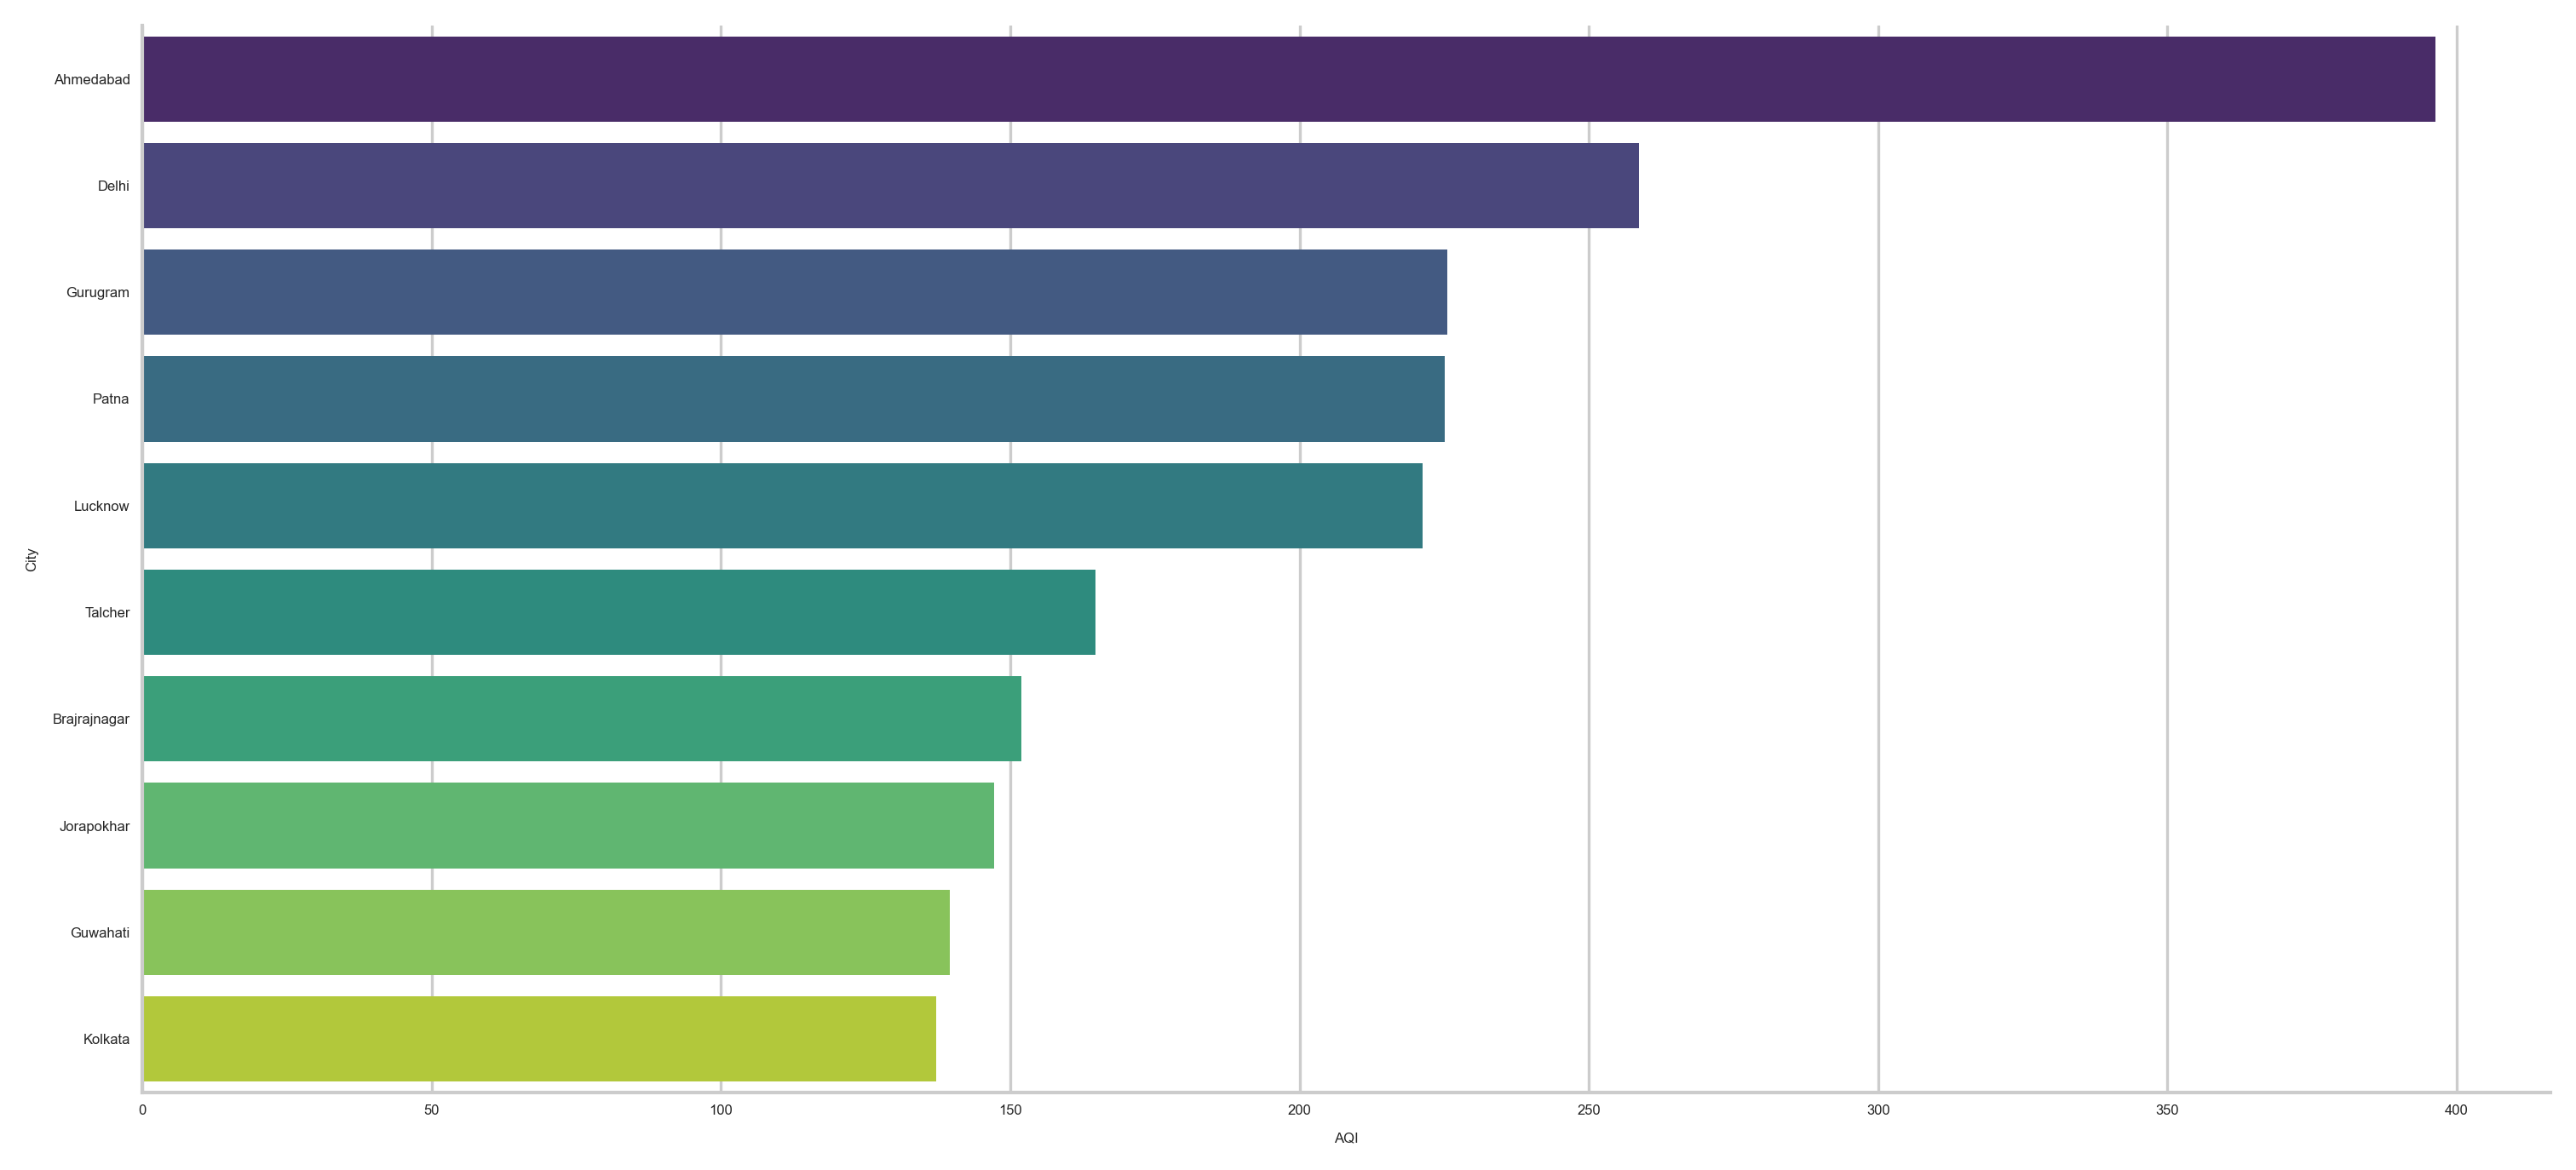

In [7]:
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,4.5))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

In [8]:
df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

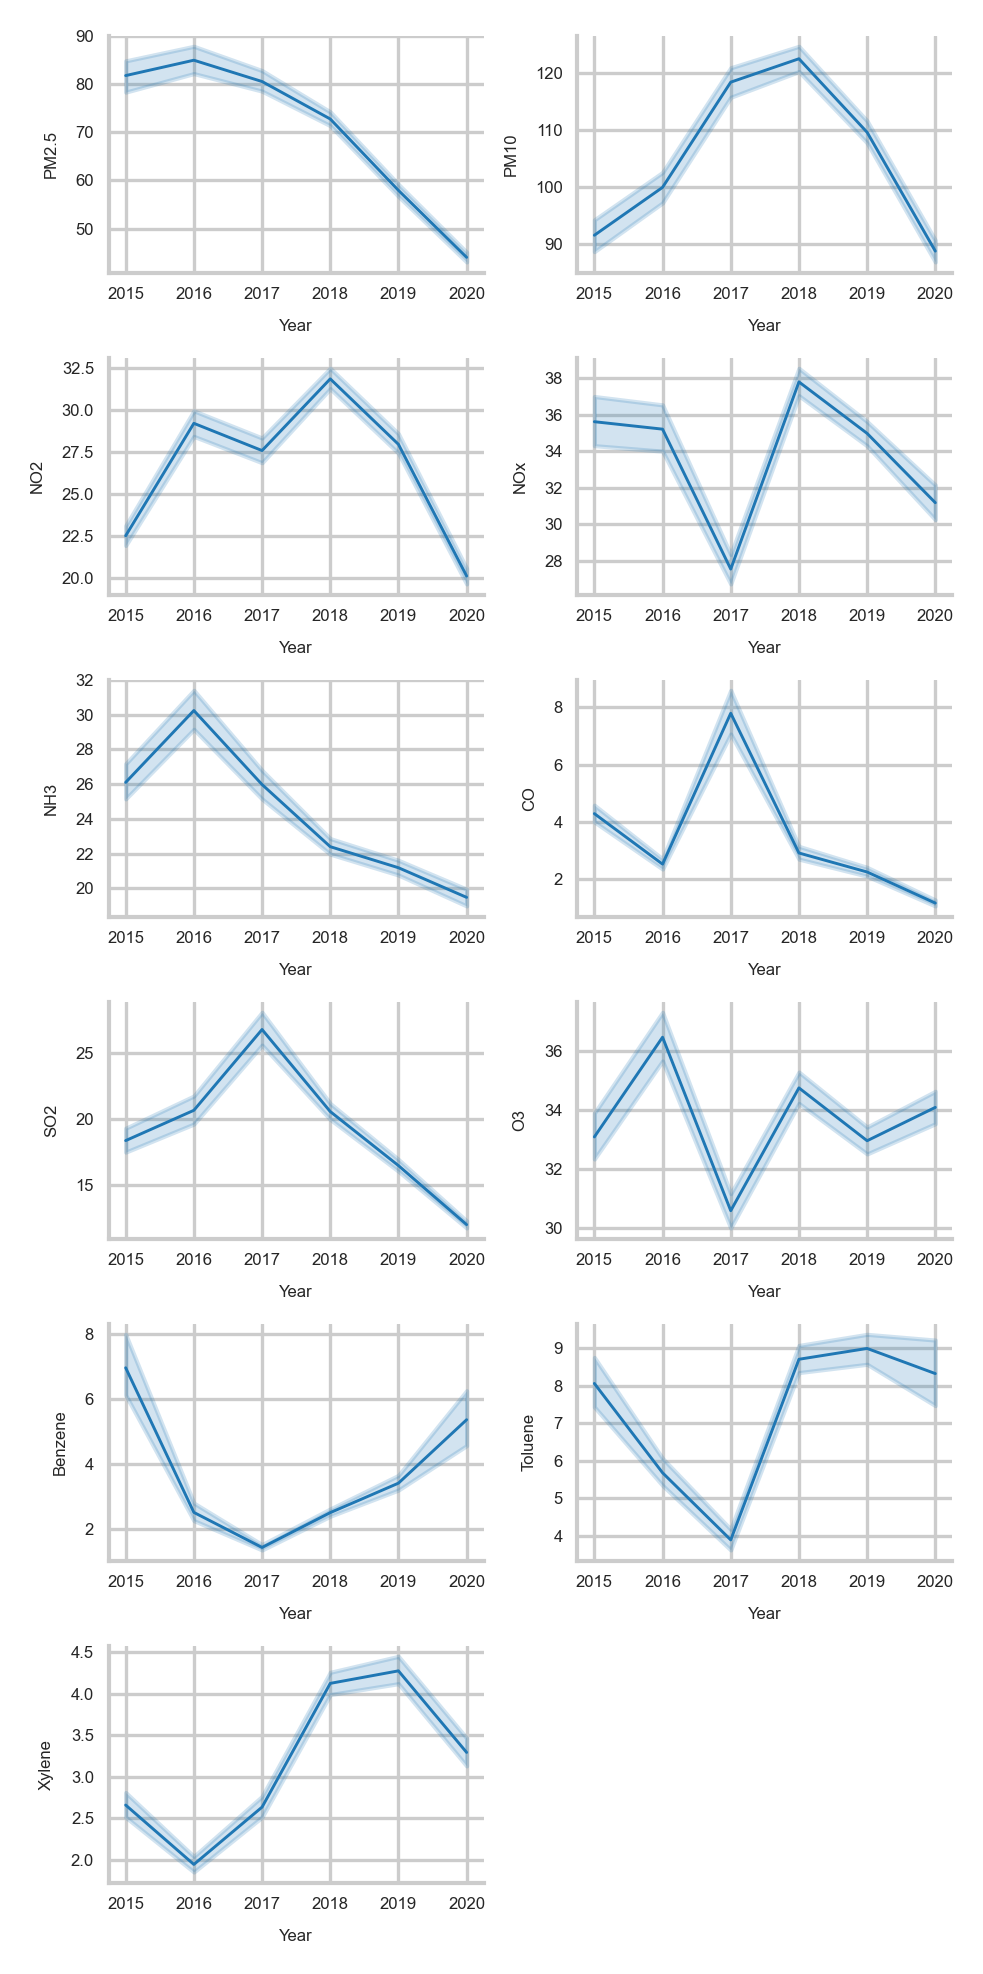

In [9]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(3.2,6.5))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

Text(0.5, 1.0, 'Correlation Analysis')

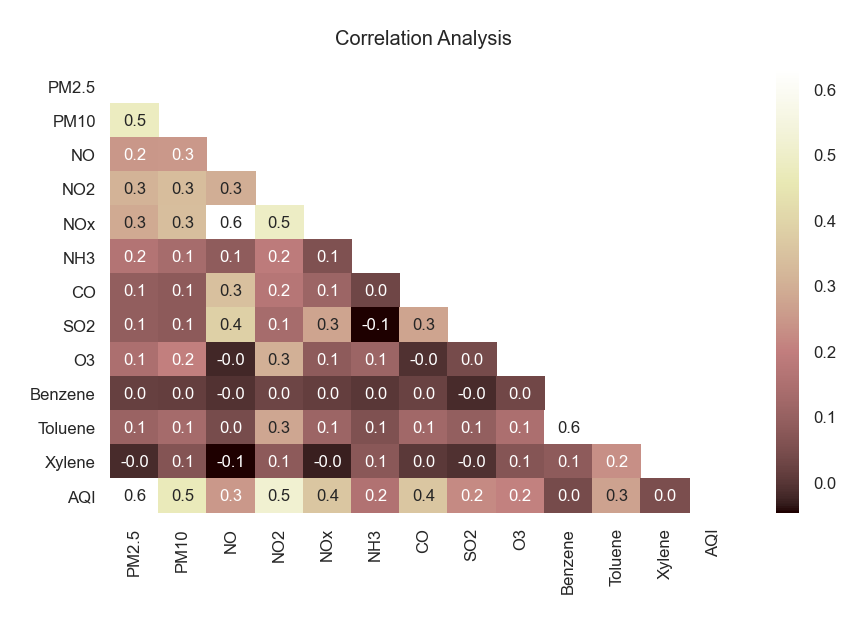

In [10]:
plt.figure(figsize=(3,2))

mask=np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='pink')
plt.title('Correlation Analysis')

<AxesSubplot:xlabel='Month', ylabel='AQI'>

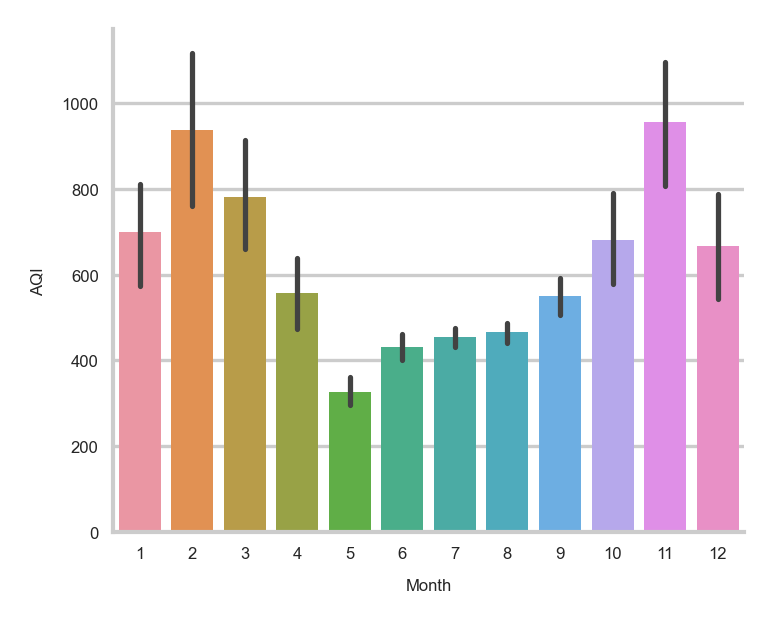

In [11]:
x=df[(df['City']=='Ahmedabad') & (df['Year']=='2018')]

plt.figure(figsize=(2.5,2))
sns.barplot(x='Month',y='AQI',data=x)

In [12]:
most_polluted = df[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,396.402937,136.079821,32.926710
Delhi,258.621453,231.098382,1.976053
Gurugram,225.563133,198.285628,1.249720
Patna,225.154467,89.004532,1.431060
Lucknow,221.298407,39.988802,2.127914
Talcher,164.714595,158.110535,1.925692
Brajrajnagar,151.867068,130.138086,1.739408
Jorapokhar,147.219846,149.159029,0.747066
Guwahati,139.604582,116.604900,0.735388


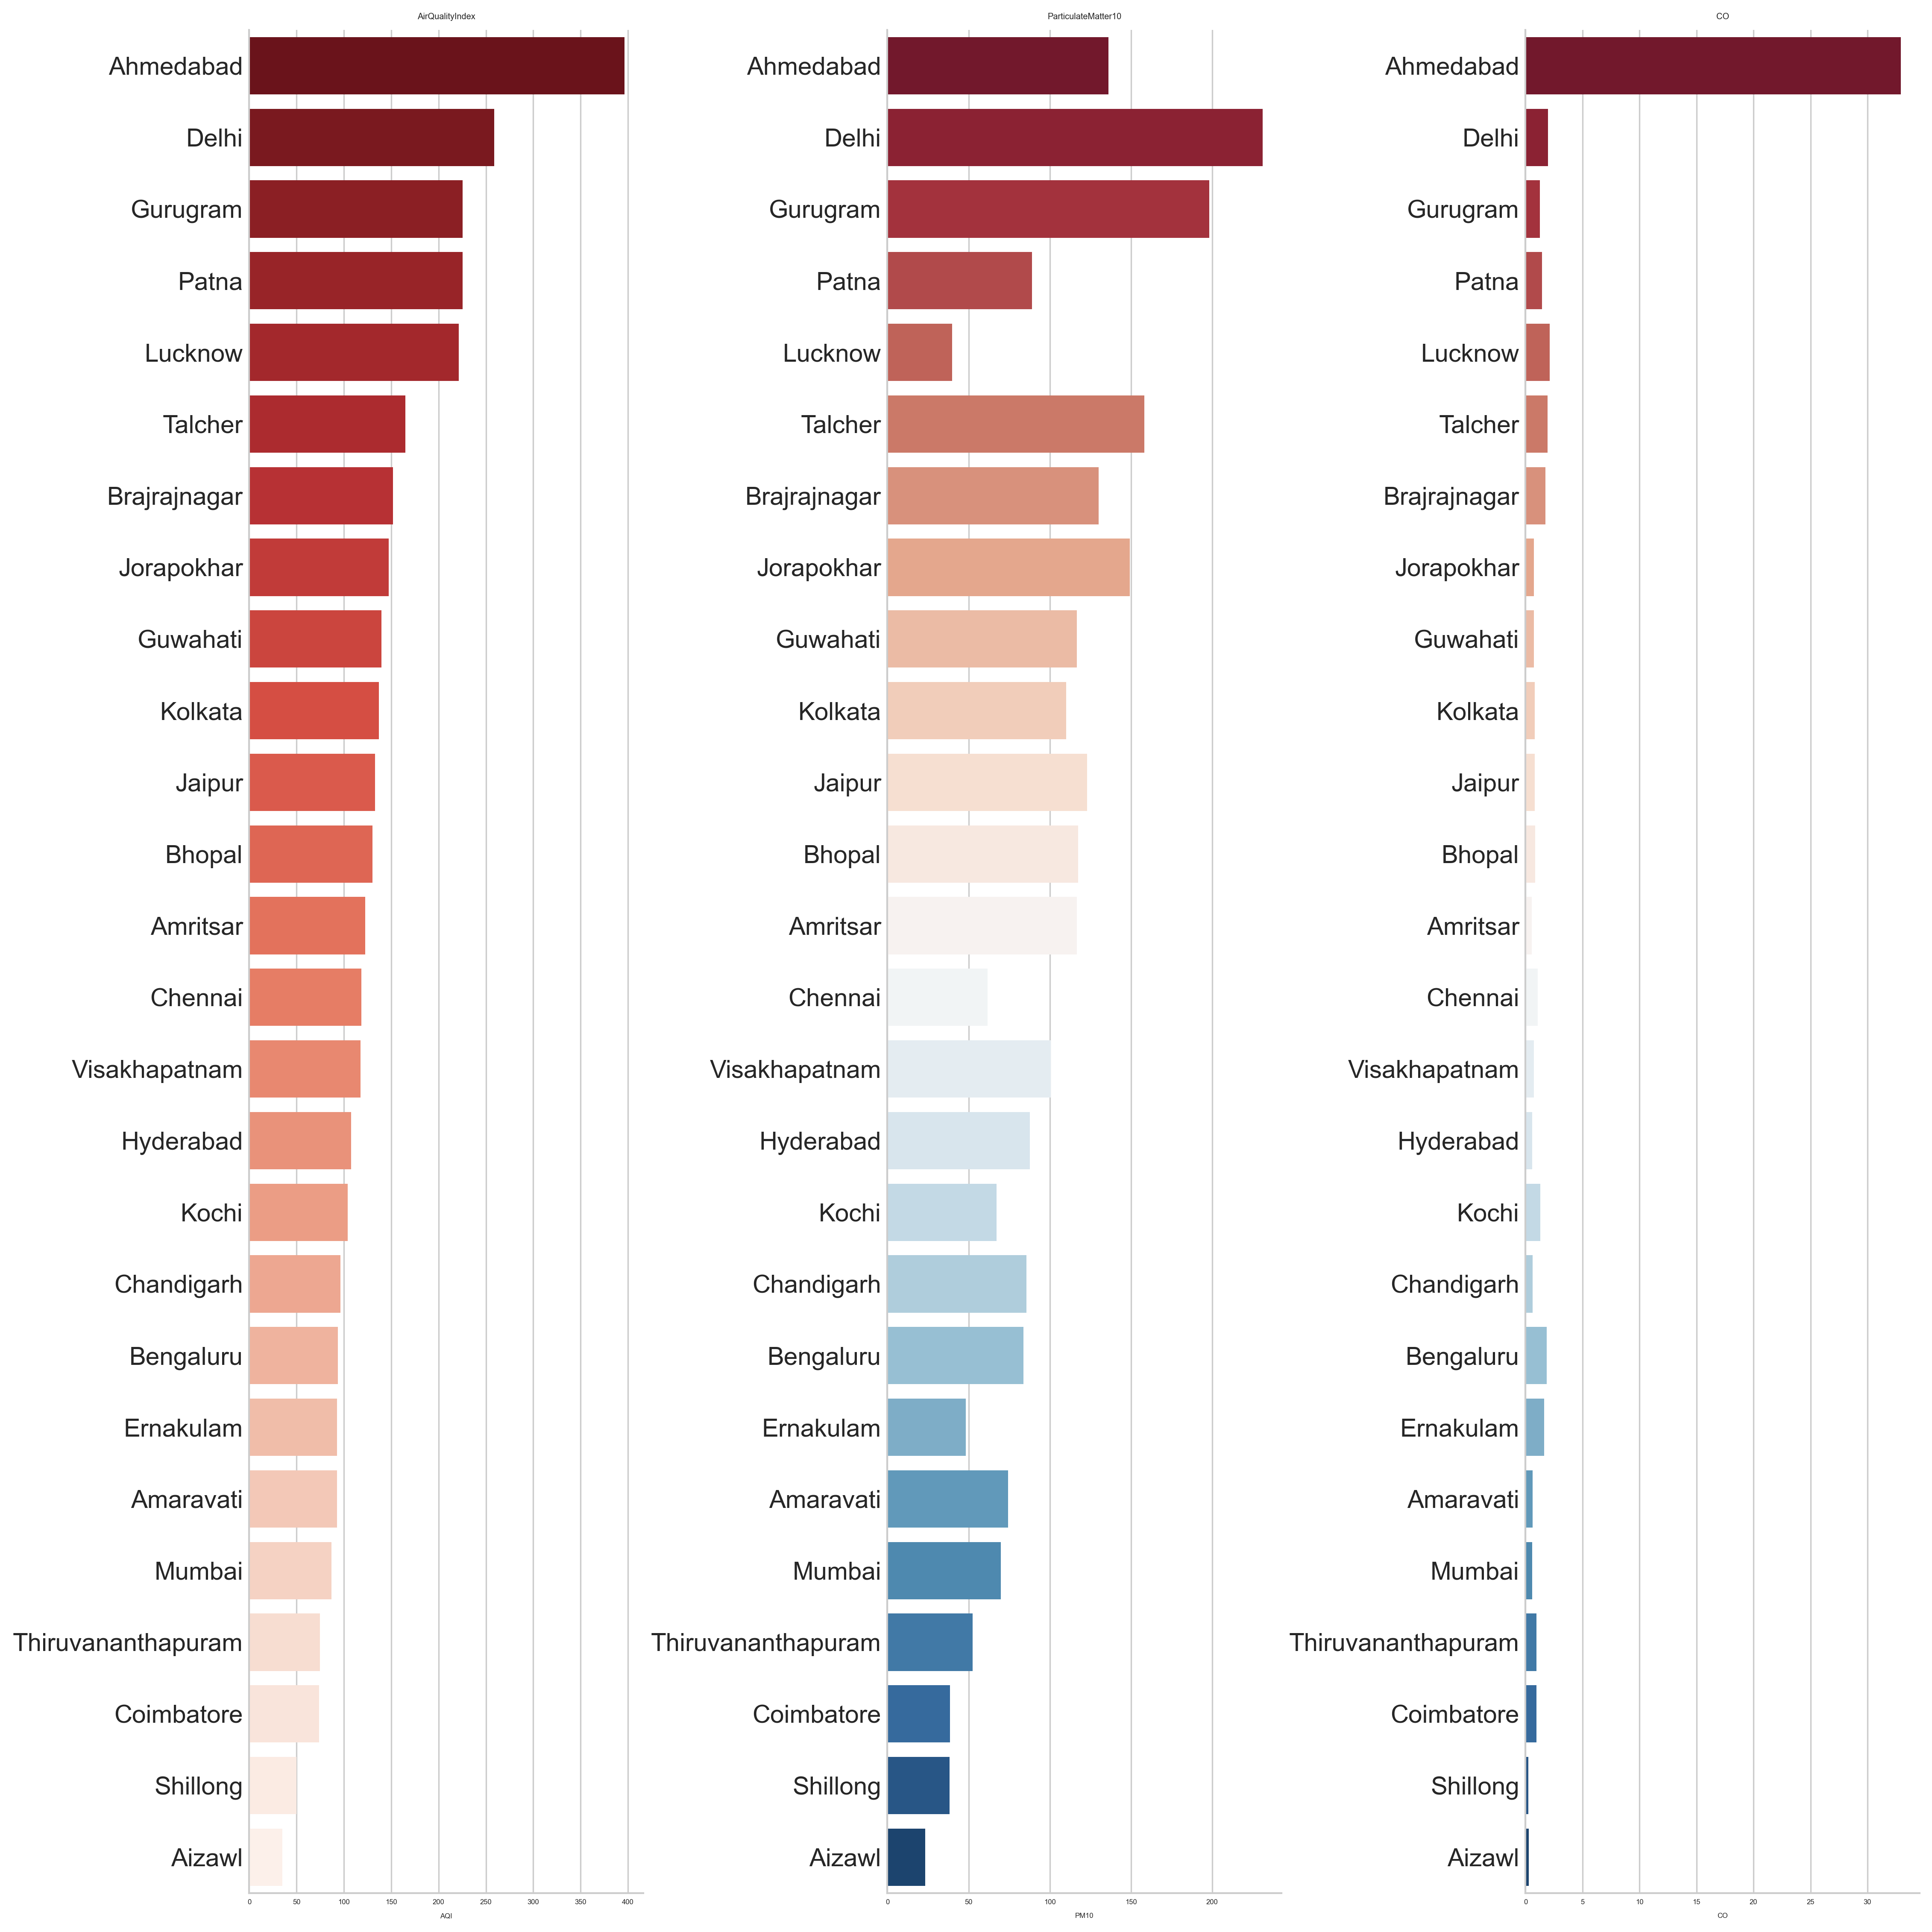

In [13]:
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

In [80]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
29526    2020
29527    2020
29528    2020
29529    2020
29530    2020
Name: year, Length: 29531, dtype: int64


In [82]:
air = pd.DataFrame()
for i in range(2015,2020):
    k=df[df['year']==i]
    kl = k[['City', 'AQI']].groupby(['City']).mean()
    air[str(i)] = kl['AQI']
print(air)


                 2015        2016        2017        2018        2019
City                                                                 
Ahmedabad  308.276013  323.836867  283.153320  622.550685  519.804110
Bengaluru  106.497260  104.532787   87.149315   86.419178   91.602740
Chennai    161.479452  136.199454  104.343836  105.490411  102.942466
Delhi      297.024658  301.035519  252.247945  249.158904  232.104110
Gurugram   139.241379  227.199595  287.952055  233.795890  195.123288
Hyderabad  127.690608  121.851093  112.439726   97.556164   93.980822
Lucknow    228.545205  235.146175  238.602740  233.772603  202.561644
Mumbai      75.551104   74.654538   73.757972   92.953771  107.950685
Patna      201.789720  248.229508  246.239726  234.510959  216.810959
